Strokes prediction 
L'objectif de cette étude est de prédire si une personne va subir une attaque

Dans un premier temps, nous commencerons par une exploration et un nettoyage des données.
Dans un second temps, nous élaborons nos modèles pour l'entraînement et le test d'algorithmes de machine learning en procédant à la mesure de leurs performances.
Dans un dernier temps, nous concluerons quant au choix du modèle le plus performant pour notre problématique d'apprentissage supervisé.

In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

Lecture des données

In [3]:
df = pd.read_csv('E:\Formation\Data_Science\Projets_DataScientest\Stroke.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
# affichage de la taille du jeu de données
print(df.shape)
# le jeu de données se compose de 5110 lignes et 12 colonnes

(5110, 12)


In [5]:
# Rapide description statisque des données quantitatives
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


Nous remarquons que tous genres confondus: la moyenne d'age des patients est de 43 ans, le patient le plus jeune a moins
d'un an (0.08) soit à peu près 1 mois, le patient le plus agé a 82 ans
l'IMC moyen donné par la variable 'bmi' est de 28,9  
le niveau de glucose moyen est 106,1

Concernant la distribution de la variable 'age':

In [6]:
df['age'].quantile(q=[0.25, 0.5, 0.75])

0.25    25.0
0.50    45.0
0.75    61.0
Name: age, dtype: float64

Regardons graphiquement la distribution de la variable 'age' à l'aide d'une boxplot(boite à moustache)

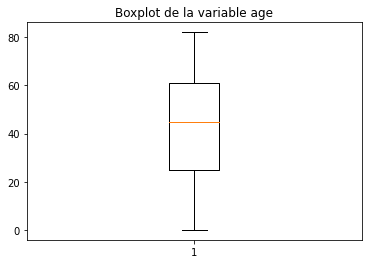

In [7]:
plt.boxplot(df.age)
plt.title('Boxplot de la variable age');

25% de la population a moins de 25ans
50% a moins de 45 ans
75% a moins de 61 ans
De plus l'age moyen (43ans) est proche du deuxième quantile, la distribution de la variable 'age' est homogène.

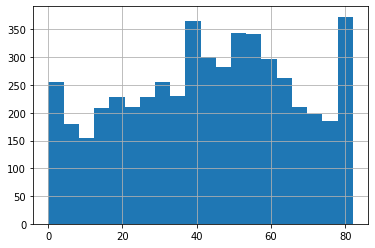

In [8]:
df.age.hist(bins = 20);

La tranche d'age des plus 80ans est la plus représentée

Regardons de plus près les données concernant les patients dont l'age a été relevé à 0,08an

In [9]:
df[df['age'] == 0.08]
# il existe deux patients qui sont des enfants, une fille et un garçon et ceux-ci n'ont pas subi d'attaque

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1614,47350,Female,0.08,0,0,No,children,Urban,139.67,14.1,Unknown,0
3295,29955,Male,0.08,0,0,No,children,Rural,70.33,16.9,Unknown,0


Regardons la situation des patients les plus agés

In [10]:
df[df['age'] == max(df['age'])]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
23,64778,Male,82.0,0,1,Yes,Private,Rural,208.30,32.5,Unknown,1
32,39373,Female,82.0,1,0,Yes,Self-employed,Urban,196.92,22.2,never smoked,1
35,712,Female,82.0,1,1,No,Private,Rural,84.03,26.5,formerly smoked,1
42,61960,Male,82.0,0,1,Yes,Private,Urban,144.90,26.4,smokes,1
56,38829,Female,82.0,0,0,Yes,Private,Rural,59.32,33.2,never smoked,1
128,37132,Male,82.0,0,0,Yes,Govt_job,Urban,200.59,29.0,formerly smoked,1
140,20439,Male,82.0,0,1,Yes,Govt_job,Rural,103.68,25.0,never smoked,1
187,67895,Female,82.0,1,1,Yes,Govt_job,Urban,215.94,27.9,formerly smoked,1
188,30184,Male,82.0,0,0,Yes,Private,Rural,86.62,29.5,formerly smoked,1
337,56357,Female,82.0,0,1,No,Private,Urban,215.60,24.9,never smoked,0


In [11]:
print('Les patients les plus agés sont au nombre de:\n' ,len(df[df['age'] == max(df['age'])]))
print(len(df[(df['age'] == max(df['age'])) & (df['stroke'] == 1)]), 'ont subi une attaque, soit',
      round(len(df[(df['age'] == max(df['age'])) & (df['stroke'] == 1)])/len(df[df['age'] == max(df['age'])]) *100, 2), 
      '% des patients les plus agés')

Les patients les plus agés sont au nombre de:
 56
9 ont subi une attaque, soit 16.07 % des patients les plus agés


In [12]:
# Quelques informations sur le type variables, sur le nombre de variables 'non-null'
df.info()
# Nous remarquons que pour toutes les variables nous comptons autant d'observations(lignes) 
# que de valeurs 'non-null', soit 5110 sauf pour la variable 'bmi' qui compte 4909 valeurs 'non-null'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


Regardons la proportion d'hommes et de femmes dans notre jeu de données

In [13]:
df.gender.value_counts(normalize = True)
# il y a une majorité de femmes, elles représentent 58,6% du jeu de données
# les hommes représentent 41,4% 

Female    0.585910
Male      0.413894
Other     0.000196
Name: gender, dtype: float64

Regardons la proportion des patients de ceux qui ont subi une attaque et ceux qui n'en ont pas subi parmi les patients de sexe
masculin et féminin

In [14]:
df.groupby('gender').stroke.value_counts(normalize = True)
# Parmi les patientes, 4,7% ont subi une attaque
# Parmi les patients, 5,1% ont subi une attaque
# Proportionnellement, les hommes semblent légèrement plus touchés que le femmes
# nous remarquons, l'existence d'un genre 'other'
# Par conséquent, la variable 'gender' influe peu sur le risque d'avoir une attaque

gender  stroke
Female  0         0.952906
        1         0.047094
Male    0         0.948936
        1         0.051064
Other   0         1.000000
Name: stroke, dtype: float64

Regardons la proportion de personnes dont le genre n'est pas déterminé

In [15]:
df[df['gender'] == 'Other']

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3116,56156,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0


Il existe un patient dont le genre n'est pas déterminé

In [16]:
# on regarde le nombre de valeurs manquantes
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

On constate qu'il existe 201 valeurs manquantes uniquement pour la variable 'bmi', ce qui semble peu en comparaison avec le nombre de ligne. Regardons ce que représente le nombre de données manquantes par rapport au nombre total de cellules du jeu de données

In [17]:
total_cells = np.product(df.shape)
total_missing_values = df.isna().sum().sum()
round((total_missing_values / total_cells) *100,2)

0.33

Le nombre de données manquantes ne représente que 0,33% de jeu de données, à priori le jeu de données semble assez complet.
La question que l'on pourrait se poser est "comment gère t-on ces données manquantes ?"
Car à priori, on peut légitimement se dire que l'indice de masse corporelle est un facteur qui donne une indication sur la corpulence, il est bien connu que cette dernière est un facteur augmentant le risque de subir une attaque.
Pourquoi cette donnée critique est-elle manquante ? Sur 5110 observations, l'imc n'a pas été relevé que sur 201 observations. Plusieurs hypothèses peuvent se poser: 
1 - L'imc a simplement été oublié ou négligé d'être relevé
2 - Au moment où ces données ont été collectées il n'était pas possible de le relever : par exemple si pour certains            patients, ces données ont été collectées au moment où ils ont été admis à l'hopital suite à une attaque, la priorité n'était pas de peser le patient et de le mesurer mais de sauver sa vie. 

Par conséquent, parmi ceux qui ont subi une attaque, regardons la proportion de ceux dont la variable 'bmi' est manquante

In [18]:
# calcul du nombre de personnes qui ont subi une attaque
print(len(df[df['stroke'] == 1]))
# 249 personnes ont subi une attaque, mais parmi ces personnes, pour combien l'IMC n'a pas été relevé ?
print(df[df['stroke'] == 1]['bmi'].isna().sum())
# 40 personnes 
print(round(df[df['stroke'] == 1]['bmi'].isna().sum() / len(df[df['stroke'] == 1]) * 100, 2), 
      '% ont la variable bmi manquante ont subi une attaque')

249
40
16.06 % ont la variable bmi manquante ont subi une attaque


Parmi ceux qui n'ont pas subi une attaque, regardons la proportion de personnes dont la variable 'bmi' n'a pas été renseignée

In [19]:
# calcul du nombre de personnes qui n'ont pas subi une attaque
print(len(df[df['stroke'] == 0]))
# 4861 personnes n'ont pas subi une attaque, mais parmi ces personnes, pour combien l'IMC n'a pas été relevé ?
print(df[df['stroke'] == 0]['bmi'].isna().sum())
# 161 personnes 
print(round(df[df['stroke'] == 0]['bmi'].isna().sum() / len(df[df['stroke'] == 0]) * 100, 2), 
      '% ont la variable bmi manquante n\'ont pas subi une attaque')

4861
161
3.31 % ont la variable bmi manquante n'ont pas subi une attaque


Pour résumer, nous voyons que 16% de ceux qui ont subi une attaque, la valeur de l'IMC n'a pas été relevé contre 3,3% chez les patients qui n'ont pas subi d'attaque, ce qui va dans le sens de l'hypothèse 1. N'ayant pas les données de poids et de tailles pour recalculer l'imc, deux possibilités s'offrent à nous:
-Soit nous supprimons les observations pour lesquelles la variable 'bmi' est manquante
-Soit nous les remplaçons par les valeurs moyennes d'IMC 
Mais nous l'avons dit plus haut les données manquantes concernant la variable 'bmi' ne représentent que 0,33% du jeu de données, par la suite, nous choisirons la deuxième possibilité, nous les remplacerons par les valeurs moyennes d'IMC.
Regardons la distribution de la variable 'bmi'

In [20]:
df['bmi'].quantile(q=[0.25, 0.5, 0.75])

0.25    23.5
0.50    28.1
0.75    33.1
Name: bmi, dtype: float64

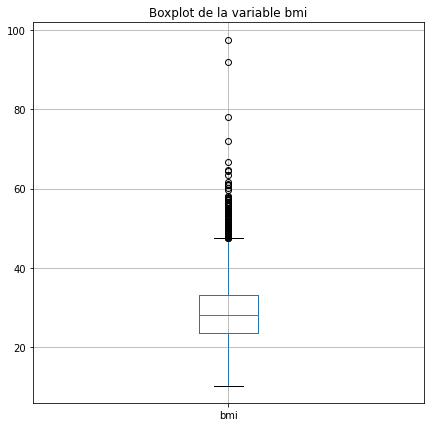

In [21]:
df.boxplot(column = 'bmi', figsize = (7,7));
plt.title('Boxplot de la variable bmi');
# Nous remarquons la présence de valeurs extrêmes, outliers

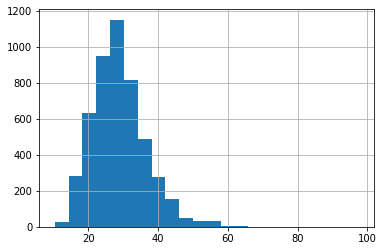

In [22]:
df.bmi.hist(bins = 22);

Nous remarquons qu'une majeure partie des individus a un IMC compris entre 20 et 40.

Regardons la distribution de la variable 'avg_glucose_level'

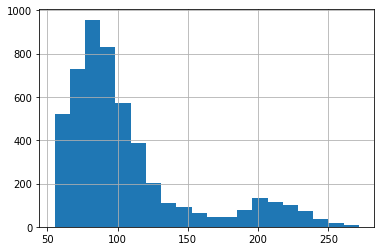

In [23]:
df.avg_glucose_level.hist(bins=20);

Une majeure partie des individus a un taux de glucose compris entre 60 et 150. Nous constatons la présence de valeurs extrêmes.

Regardons la distribution de la variable ever_married

In [24]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [25]:
# Pour la variable 'ever_married' remplacement de 'No' par '0' et 'Yes' par '1'
df.ever_married = df.ever_married.replace(['No', 'Yes'], [0,1])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked,1


In [26]:
df.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [27]:
# Pour la variable 'Residence_type' remplacement de 'Rural' par '0' et 'Urban' par '1'
df.Residence_type = df.Residence_type.replace(['Rural', 'Urban'], [0,1])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.0,never smoked,1


In [28]:
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [29]:
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [30]:
# Remplacement des valeurs manquantes de la variables bmi  par leur valeur moyenne
df = df.fillna(df.bmi.mean())

In [31]:
# On vérifie qu'il n'y a plus de valeurs manquantes
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

Regardons l'influence de certains facteurs sur le risque d'avoir une attaque.
Regardons parmi les personnes qui ont eu une attaque combien font de l'hypertension

In [32]:
print('Parmi les personnes qui ont eu une attaque', 
      round(len(df[(df['stroke'] == 1)&(df['hypertension'] == 1)]) / len(df[df['stroke'] == 1]) * 100,2)
      , ' % font de l\'hypertension')

Parmi les personnes qui ont eu une attaque 26.51  % font de l'hypertension


Regardons parmi les personnes qui ont eu une attaque, combien souffrent d'une maladie du coeur
 

In [33]:
print('Parmi les personnes qui ont eu une attaque', 
      round(len(df[(df['stroke'] == 1)&(df['heart_disease'] == 1)]) / len(df[df['stroke'] == 1]) * 100,2)
      , ' % souffrent d\'une maladie du coeur')

Parmi les personnes qui ont eu une attaque 18.88  % souffrent d'une maladie du coeur


Regardons parmi les personnes qui ont eu une attaque, combien sont en surpoids, c'est à dire qui ont un indice de masse corporelle(IMC) supérieur 25 (source : https://www.topsante.com/outils/imc). Il existe des exceptions pour les personnes très musclées qui ont en théorie un imc supérieur à 25 mais ont un pourcentage de masse de graisse plus bas que la moyenne. Nous faisons l'hypothèse que les personnes présentes dans notre jeu de données ne font pas partie de cette exception.

In [34]:
print('Parmi les personnes qui ont eu une attaque', 
      round(len(df[(df['stroke'] == 1)&(df['bmi'] > 25)]) / len(df[df['stroke'] == 1]) * 100,2)
      , ' % sont en surpoids ')

Parmi les personnes qui ont eu une attaque 84.74  % sont en surpoids 


Nous constatons que la majorité des personnes qui ont subi une attaque est en surpoids, cela confirme bien que le surpoids est un facteur qui augmente le risque de subir une attaque cardiaque. D'après notre jeu de donnée, la variable 'bmi' est donc celle qui influe le plus sur le risque d'avoir une attaque, toutes choses étant égales par ailleurs.
Regardons les niveaux de glycémie minimal, maximal et moyen des personnes qui ont subi une attaque et comparons à l'ensemble du jeu de données.

In [35]:
print('La glycémie minimale des personnes ayant subi une attaque est de:\n'
      ,df[(df['stroke'] == 1)]['avg_glucose_level'].min().round(2))
print('La glycémie maximale des personnes ayant subi une attaque est de:\n'
      ,df[(df['stroke'] == 1)]['avg_glucose_level'].max().round(2))
print('La glycémie moyenne des personnes ayant subi une attaque est de:\n'
      ,df[(df['stroke'] == 1)]['avg_glucose_level'].mean().round(2))

La glycémie minimale des personnes ayant subi une attaque est de:
 56.11
La glycémie maximale des personnes ayant subi une attaque est de:
 271.74
La glycémie moyenne des personnes ayant subi une attaque est de:
 132.54


Les glycémies minimale et moyenne sont supérieures à celle de l'ensemble de notre jeu de données. Ce qui indique qu'une glycémie élevée augmente le risque de subir une attaque cardiaque.

Regardons parmi les personnes qui ont eu une attaque, combien font de l'hypertension, souffre d'une maladie de coeur et ont un IMC > 25

In [36]:
print('Parmi les personnes qui ont eu une attaque', 
      round(len(df[(df['stroke'] == 1)&(df['hypertension'] == 1)&(df['heart_disease'] == 1)&(df['bmi'] > 25)]) 
            / len(df[df['stroke'] == 1]) * 100,2)
      , ' % font de l\'hypertension, souffre d\'une maladie de coeur et ont un IMC >25')

Parmi les personnes qui ont eu une attaque 5.22  % font de l'hypertension, souffre d'une maladie de coeur et ont un IMC >25


Regardons la répartition de la variable smoking_status

In [37]:
df.smoking_status.value_counts(normalize = True)

never smoked       0.370254
Unknown            0.302153
formerly smoked    0.173190
smokes             0.154403
Name: smoking_status, dtype: float64

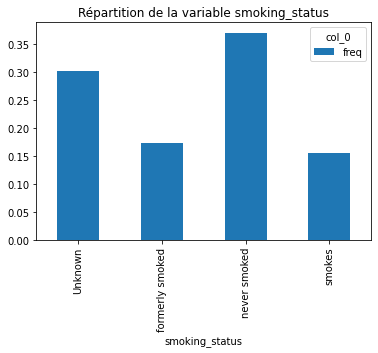

In [38]:
t = pd.crosstab(df.smoking_status, "freq", normalize=True)
t.plot(kind = "bar");
plt.title('Répartition de la variable smoking_status');

Dans notre échantillon, la proportion de personnes qui n'a jamais fumé est majoritaire et celle des fumeurs est minoritaire.

Etudions la corrélation entre la variable 'smoking_status' dans la variable 'stroke' 

In [39]:
# Déterminons la table de contingence
table_1 = pd.crosstab(df['smoking_status'],df['stroke'])
table_1

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


Effectuons un test de chi2_contingency de scipy appliquée à la table de contingence
Posons l'hypothèse H0 : les variables 'smoking_status' et 'stroke' sont indépendantes

In [40]:
from scipy.stats import chi2_contingency

resultats_test = chi2_contingency(table_1)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)
# p-value < 5% donc on rejette H0

29.147269191399264 2.0853997025008455e-06 3


Pour mesurer le niveau de corrélation, calculons, le V-Cramer

In [41]:
def V_Cramer(table, N):
    stat_chi2 = chi2_contingency(table)[0]
    k = table.shape[0]
    r = table.shape[1]
    phi = max(0,(stat_chi2/N)-((k-1)*(r-1)/(N-1)))
    k_corr = k - (np.square(k-1)/(N-1))
    r_corr = r - (np.square(r-1)/(N-1))
    return np.sqrt(phi/min(k_corr - 1,r_corr - 1))

V_Cramer(table_1, df.shape[0])

0.07153858559970024

Le V_Cramer est faible, il y a une faible corrélation entre les 'smoking_status' et 'stroke'

Regardons la répartition de la variable 'smoking_status' dans la variable 'stroke'

In [42]:
df.groupby('stroke').smoking_status.value_counts(normalize = True)

stroke  smoking_status 
0       never smoked       0.370706
        Unknown            0.307961
        formerly smoked    0.167661
        smokes             0.153672
1       never smoked       0.361446
        formerly smoked    0.281124
        Unknown            0.188755
        smokes             0.168675
Name: smoking_status, dtype: float64

La distribution de la variable smoking_status dans la variable 'stroke' est similaire pour les catégories 'never smoked' et 'smokes' à celle dans le jeu de données global. Par contre, parmi les personnes ayant subi une attaque la proportion des anciens fumeurs est plus grande que dans l'ensemble du jeu de données. La cigarette semble être un facteur aggravant sur le long terme. Regardons ci-dessous graphiquement la répartition de la variable "smoking_status" dans la variable 'stroke'.

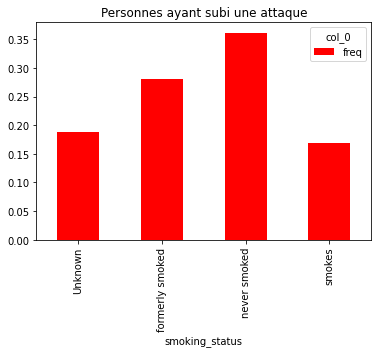

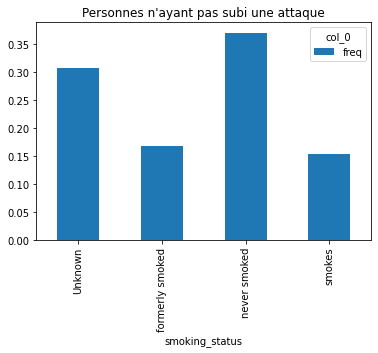

In [43]:
t = pd.crosstab(df[(df['stroke'] == 1)]['smoking_status'], "freq", normalize=True)
t1 = pd.crosstab(df[(df['stroke'] == 0)]['smoking_status'], "freq", normalize=True)
t.plot.bar(color = 'red')
plt.title('Personnes ayant subi une attaque')
t1.plot.bar()
plt.title('Personnes n\'ayant pas subi une attaque');

Regardons la répartition de la variable 'work_type' dans le jeu de données

In [44]:
df.work_type.value_counts(normalize = True)

Private          0.572407
Self-employed    0.160274
children         0.134442
Govt_job         0.128571
Never_worked     0.004305
Name: work_type, dtype: float64

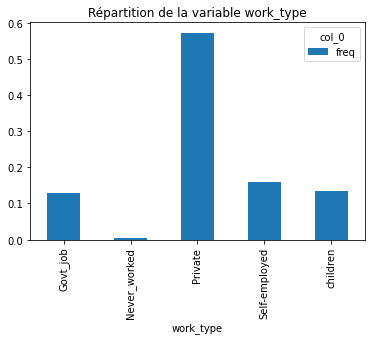

In [45]:
t1 = pd.crosstab(df.work_type, "freq", normalize=True)
t1.plot(kind = "bar");
plt.title('Répartition de la variable work_type');

Regardons la corrélation entre la variable 'work_type' dans la variable 'stroke'

In [46]:
# Déterminons la table de contingence
table_2 = pd.crosstab(df['work_type'],df['stroke'])
table_2

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


Effectuons un test de chi2_contingency de scipy appliquée à la table de contingence
Posons l'hypothèse H0 : les variables 'work_type' et 'stroke' sont indépendantes

In [47]:
resultats_test = chi2_contingency(table_2)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)
# p-value < 5% donc on rejette H0

49.163511976675295 5.397707801896119e-10 4


Pour mesurer le niveau de corrélation, calculons, le V-Cramer

In [48]:
V_Cramer(table_2, df.shape[0])

0.09402041104598291

Le V_Cramer est faible, il y a une faible corrélation entre les variables 'work_type' et 'stroke'

Regardons la répartition de la variable 'work_type' dans la variable 'stroke'

In [49]:
df.groupby('stroke').work_type.value_counts(normalize = True)

stroke  work_type    
0       Private          0.571076
        Self-employed    0.155112
        children         0.140918
        Govt_job         0.128369
        Never_worked     0.004526
1       Private          0.598394
        Self-employed    0.261044
        Govt_job         0.132530
        children         0.008032
Name: work_type, dtype: float64

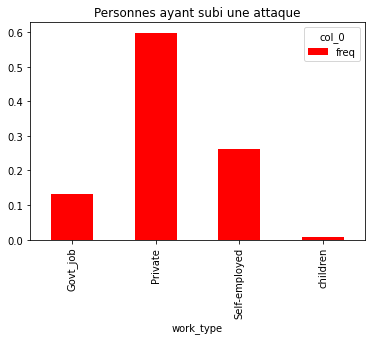

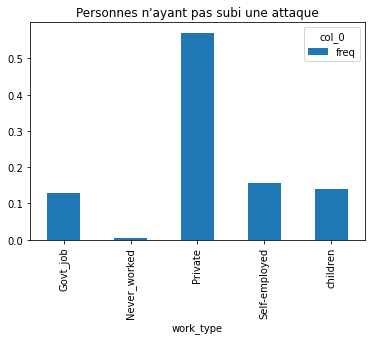

In [50]:
t2 = pd.crosstab(df[(df['stroke'] == 1)]['work_type'], "freq", normalize=True)
t3 = pd.crosstab(df[(df['stroke'] == 0)]['work_type'], "freq", normalize=True)
t2.plot.bar(color = 'red')
plt.title('Personnes ayant subi une attaque')
t3.plot.bar()
plt.title('Personnes n\'ayant pas subi une attaque');

Nous remarquons que la catégorie 'Private' est majoritaire à plus de 50%, les proportions restent proche de celle de l'ensemble du jeu de données. Par contre la proportion de la catégorie 'self-employed' est plus grande de 10% parmi ceux qui ont subi une attaque. Ceux qui sont à leur compte ont donc plus de chance de faire une attaque.

Regardons la répartition de la variable 'Residence_type'

In [51]:
df.Residence_type.value_counts(normalize = True)

1    0.508023
0    0.491977
Name: Residence_type, dtype: float64

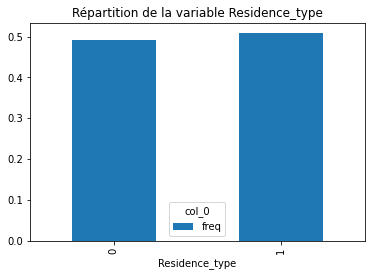

In [52]:
t4 = pd.crosstab(df.Residence_type, "freq", normalize=True)
t4.plot(kind = "bar");
plt.title('Répartition de la variable Residence_type');

Regardons la corrélation entre les variables 'Residence_type' et 'stroke'

In [53]:
# Déterminons la table de contingence
table_3 = pd.crosstab(df['Residence_type'],df['stroke'])
table_3

stroke,0,1
Residence_type,,
0,2400,114
1,2461,135


Effectuons un test de chi2_contingency de scipy appliquée à la table de contingence
Posons l'hypothèse H0 : les variables 'Residence_type' et 'stroke' sont indépendantes

In [54]:
resultats_test = chi2_contingency(table_3)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)
# p-value > 5% on ne rejette pas H0 

1.0816367471627524 0.29833169286876987 1


Pour mesurer le niveau de corrélation, calculons, le V-Cramer

In [55]:
V_Cramer(table_3, df.shape[0])

0.003992580152454577

Le V_Cramer est proche de 0, il y a peu ou pas de corrélation entre les variables 'Residence_type' et 'stroke'

Regardons la répartition de la variable 'Residence_type' dans la variable 'stroke'

In [56]:
df.groupby('stroke').Residence_type.value_counts(normalize = True)

stroke  Residence_type
0       1                 0.506274
        0                 0.493726
1       1                 0.542169
        0                 0.457831
Name: Residence_type, dtype: float64

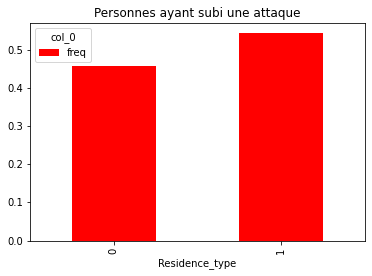

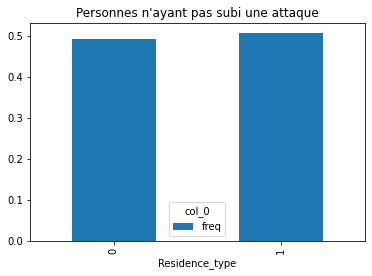

In [57]:
t5 = pd.crosstab(df[(df['stroke'] == 1)]['Residence_type'], "freq", normalize=True)
t6 = pd.crosstab(df[(df['stroke'] == 0)]['Residence_type'], "freq", normalize=True)
t5.plot.bar(color = 'red')
plt.title('Personnes ayant subi une attaque')
t6.plot.bar()
plt.title('Personnes n\'ayant pas subi une attaque');

Les proportions changent quand on regarde les personnes qui ont subi une attaque.
Parmi ces personnes, les personnes vivant en milieu urbain sont un peu plus touché  54,2% contre 45,8 % vivant en milieu urbain.

Regardons la répartition de la variable 'ever_married'

In [58]:
df.ever_married.value_counts(normalize = True)

1    0.656164
0    0.343836
Name: ever_married, dtype: float64

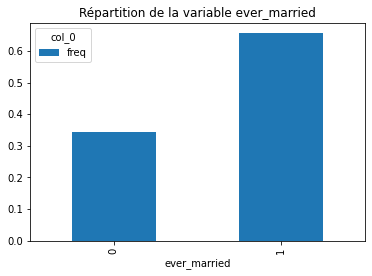

In [59]:
t7 = pd.crosstab(df.ever_married, "freq", normalize=True)
t7.plot(kind = "bar");
plt.title('Répartition de la variable ever_married');

65,6% des personnes sont mariés contre 34,4% qui ne le sont pas.

Regardons la corrélation entre les variables 'ever_married' et 'stroke'

In [60]:
# Déterminons la table de contingence
table_4 = pd.crosstab(df['ever_married'],df['stroke'])
table_4

stroke,0,1
ever_married,,
0,1728,29
1,3133,220


Effectuons un test de chi2_contingency de scipy appliquée à la table de contingence
Posons l'hypothèse H0 : les variables 'ever_married' et 'stroke' sont indépendantes

In [61]:
resultats_test = chi2_contingency(table_4)
statistique = resultats_test[0]
p_valeur = resultats_test[1]
degre_liberte = resultats_test[2]

print(statistique, p_valeur,degre_liberte)
# p-value < 5% on rejette H0 

58.923890259034195 1.6389021142314745e-14 1


Pour mesurer le niveau de corrélation, calculons, le V-Cramer

In [62]:
V_Cramer(table_4, df.shape[0])

0.10647807334277677

Le V_Cramer est faible, il y a une faible corrélation entre les variables 'ever_married' et 'stroke'

Regardons la répartition de la variable 'ever_married' dans la variable 'stroke'

In [63]:
df.groupby('stroke').ever_married.value_counts(normalize = True)

stroke  ever_married
0       1               0.644518
        0               0.355482
1       1               0.883534
        0               0.116466
Name: ever_married, dtype: float64

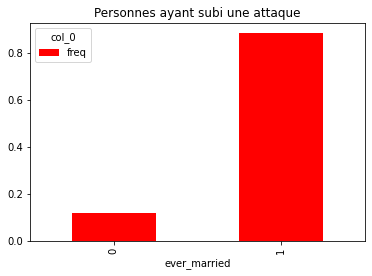

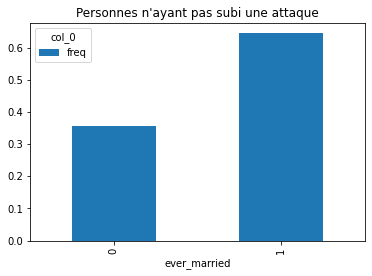

In [64]:
t8 = pd.crosstab(df[(df['stroke'] == 1)]['ever_married'], "freq", normalize=True)
t9 = pd.crosstab(df[(df['stroke'] == 0)]['ever_married'], "freq", normalize=True)
t8.plot.bar(color = 'red')
plt.title('Personnes ayant subi une attaque')
t9.plot.bar()
plt.title('Personnes n\'ayant pas subi une attaque');

Les proportions de personnes mariés augmentent quand on regarde les personnes qui ont subi une attaque.
Elle passe de 64,5% à 88,4% alors que pour celles qui ne sont pas mariées passent de 35,5 à 11,6% pour les non mariés.
D'après le jeu de données le fait d'être marié augmente le risque d'avoir une attaque.

Nous avons exploré les relations entre les variables qualititatives, explorons les relations entre les variables quantitatives.
Regardons s'il existe des corrélations entre les variables quantitatives 'bmi' et 'avg_glucose_level', autrement dit si elles varient ensemble, nous proposons de faire un test de Pearsonr 

In [65]:
from scipy.stats import pearsonr

pd.DataFrame(pearsonr(df['bmi'], df['avg_glucose_level']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

#la p-value < 5%, le coefficient proche de 0, il y a une faible corrélation entre les deux variables.

,resultat_test
pearson_coeff,1.687514e-01
p-value,5.927281e-34


Pour confirmer la faible corrélation, regardons graphiquement

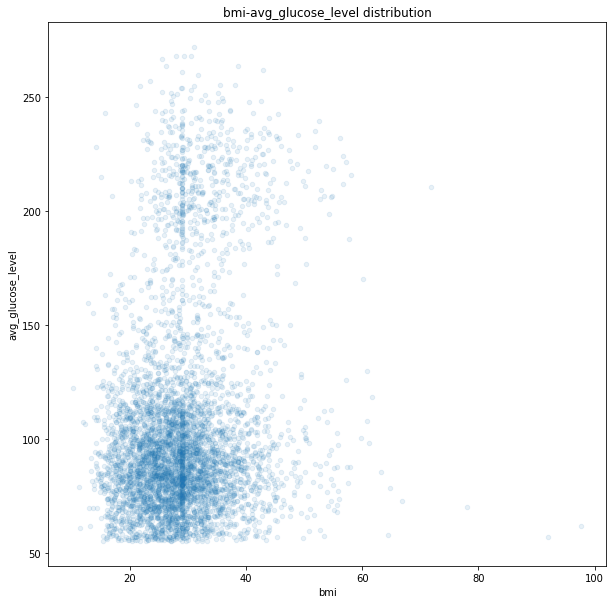

In [66]:
from pandas.plotting import scatter_matrix
%matplotlib inline

df.plot(kind='scatter', x='bmi', y='avg_glucose_level', figsize=(10,10), title = 'bmi-avg_glucose_level distribution', alpha=0.1);

Autrement dit, niveau de glucose élevé ne signifie pas forcément que la personne soit en surpoids, une personne en surpoids
n'a pas forcément un niveau de glucose élevé dans le sang.

Regardons s'il existe des corrélations entre les variables quantitatives 'age' et 'bmi', autrement dit si elles varient ensemble, nous proposons de faire un test de Pearsonr 

In [67]:
pd.DataFrame(pearsonr(df['age'], df['bmi']), index=['pearson_coeff','p-value'], columns=['resultat_test'])
#la p-value < 5%, le coefficient proche de 0, il y a une faible corrélation entre les deux variables.

,resultat_test
pearson_coeff,3.259425e-01
p-value,8.995421e-127


Pour confirmer la faible corrélation, regardons graphiquement

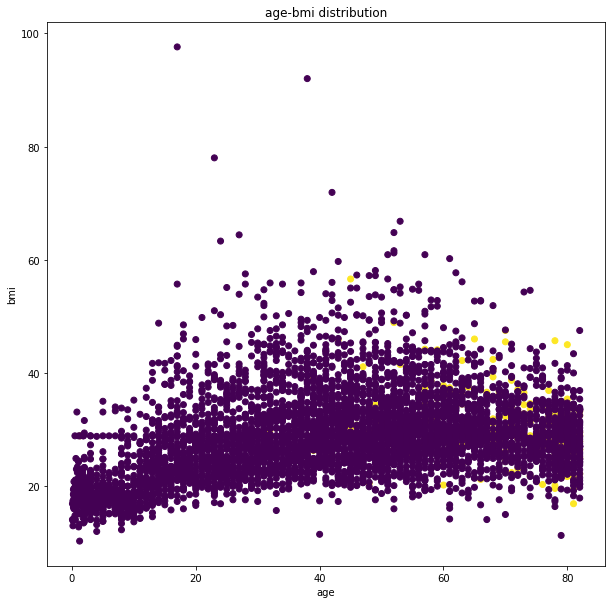

In [68]:
plt.figure(figsize=(10,10))
plt.scatter(df['age'], df['bmi'], c=df['stroke'])
plt.xlabel('age')
plt.ylabel('bmi')
plt.title('age-bmi distribution')
plt.legend;

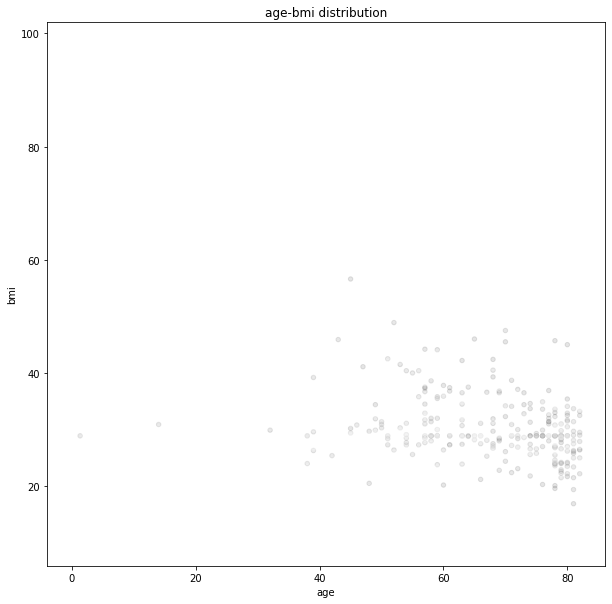

In [69]:
%matplotlib inline

df.plot(kind='scatter', x='age', y='bmi', figsize=(10,10), title = 'age-bmi distribution', alpha=0.1, c=df['stroke']);

La faible corrélation entre les variables 'age' et 'bmi' est confirmée graphiquement. Autrement dit, la variable bmi n'augmente pas forcément avec l'age. Pour chaque tranche d'age, il existe des personnes en surpoids ou en insuffisance pondérale (bmi < 18,5).
Par contre, il semble que ceux qui ont subi une attaque ont majoritairement plus de 40 ans.

Regardons s'il existe des corrélations entre les variables quantitatives 'age' et 'avg_glucose_level', autrement dit si elles varient ensemble, nous proposons de faire un test de Pearsonr

In [70]:
pd.DataFrame(pearsonr(df['age'], df['avg_glucose_level']), index=['pearson_coeff','p-value'], columns=['resultat_test'])

#la p-value < 5%, le coefficient proche de 0, il y a une faible corrélation entre les deux variables.

,resultat_test
pearson_coeff,2.381711e-01
p-value,7.856311e-67


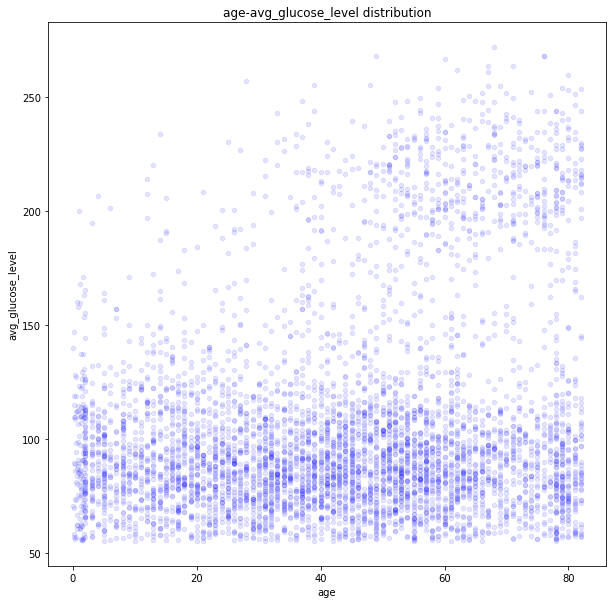

In [71]:
%matplotlib inline

df.plot(kind='scatter', x='age', y='avg_glucose_level', figsize=(10,10), title = 'age-avg_glucose_level distribution', alpha=0.1, c = 'b');

In [72]:
import statsmodels.api 

result = statsmodels.formula.api.ols('bmi ~ stroke', data=df).fit()
table = statsmodels.api.stats.anova_lm(result)

table

#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle bmi n'influe pas sur stroke.
# ce qui est pertinent avec ce que nous avons noté plus haut, plus la variable bmi est élevée plus les chances
# de subir une attaque sont élevées

,df,sum_sq,mean_sq,F,PR(>F)
stroke,1.0,459.232642,459.232642,7.759776,0.005362
Residual,5108.0,302297.442823,59.181175,NaN,NaN


In [73]:
result = statsmodels.formula.api.ols('age ~ stroke', data=df).fit()
table_2 = statsmodels.api.stats.anova_lm(result)

table_2

#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle age n'influe pas sur stroke.
# ce qui est pertinent avec ce que nous avons noté plus haut, la majeure partie de ceux qui ont subi une attaque ont plus 
# de 40 ans, le risque de subir une attaque augmente avec l'âge 

,df,sum_sq,mean_sq,F,PR(>F)
stroke,1.0,1.571386e+05,157138.552246,326.916568,7.030778e-71
Residual,5108.0,2.455256e+06,480.668671,NaN,NaN


In [74]:
result = statsmodels.formula.api.ols('avg_glucose_level ~ stroke', data=df).fit()
table_3 = statsmodels.api.stats.anova_lm(result)

table_3

#la p-value (PR(>F)) est inférieur à 5% donc on rejette l'hypothèse selon laquelle avg_glucose_level n'influe pas sur stroke.
# ce qui est pertinent avec ce que nous avons noté plus haut, le risque de subir une attaque augmente avec le niveau de 
# de glucose dans le sang

,df,sum_sq,mean_sq,F,PR(>F)
stroke,1.0,1.823920e+05,182392.008675,90.50387,2.767811e-21
Residual,5108.0,1.029413e+07,2015.295141,NaN,NaN


Machine Learning

Nous sommes face à un problème d'apprentissage supervisé car il existe une variable cible, la variable 'stroke'.
La variable 'stroke' est qualitative, il s'agit donc d'un problème de classification.
Pour permettre le fonctionnement des algorithmes de prédiction, nous proposons d'encoder grâce à la méthode 'One Hot Encoding' les variables qualitatives 'work_type', 'smoking_status' et 'gender' qui n'ont pas pu être binarisées(car elles présentent un nombre de modalité supérieur à 2)

In [75]:
df1 = pd.get_dummies(df, columns = ['work_type', 'smoking_status', 'gender'])
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,1,Private,1,228.69,36.600000,formerly smoked,1
1,51676,Female,61.0,0,0,1,Self-employed,0,202.21,28.893237,never smoked,1
2,31112,Male,80.0,0,1,1,Private,0,105.92,32.500000,never smoked,1
3,60182,Female,49.0,0,0,1,Private,1,171.23,34.400000,smokes,1
4,1665,Female,79.0,1,0,1,Self-employed,0,174.12,24.000000,never smoked,1


Nous procédons à la suppression de la variable 'id' qui représente l'identifiant des patients, elle n'aura donc aucune utilité dans notre modèle

In [76]:
df1 = df1.drop(['id'], axis = 1)
df1.rename(columns={'work_type_Self-employed': 'work_type_Self_employed', 
                    'smoking_status_formerly smoked': 'smoking_status_formerly_smoked',
                    'smoking_status_never smoked' : 'smoking_status_never_smoked'}, inplace=True)
df1

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0,1,0,0
5106,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0,1,0,0
5107,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0,1,0,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0,0,1,0


In [77]:
df1

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,stroke,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.600000,1,0,0,1,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,1,0,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.500000,1,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,1,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,0,1,0,174.12,24.000000,1,0,0,0,1,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,1,1,83.75,28.893237,0,0,0,1,0,0,0,0,1,0,1,0,0
5106,81.0,0,0,1,1,125.20,40.000000,0,0,0,0,1,0,0,0,1,0,1,0,0
5107,35.0,0,0,1,0,82.99,30.600000,0,0,0,0,1,0,0,0,1,0,1,0,0
5108,51.0,0,0,1,0,166.29,25.600000,0,0,0,1,0,0,0,1,0,0,0,1,0


Nous procédons à la désignation des variables explicatives et de la variable cible.

In [78]:
# les variables explicatives
X = df1.drop(['stroke'], axis = 1)
# la variable cible
y = df1['stroke']

In [79]:
#import de la fonction train_test_split
from sklearn.model_selection import train_test_split

#séparation des jeux de test et d'entrainement
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42, stratify =y)


In [80]:
#Normalisation des données d'entraînement et de test.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = MinMaxScaler()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

In [81]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier



In [82]:
### Regression logistique 

LogReg = LogisticRegression(solver='newton-cg')

# Entrainement 
LogReg.fit(X_train_norm, y_train)

# Prédiction 
y_pred = LogReg.predict(X_test_norm)

# on effectue les prédictions sur X_train_norm
y_pred_train = LogReg.predict(X_train_norm)

# on effectue les prédictions sur X_test_norm
y_pred_test = LogReg.predict(X_test_norm)

# on calcule les coefficients
coef_ = LogReg.coef_

# on calcule les odd-ratios
odd_ratios = np.exp(LogReg.coef_)

# on calcule l'intercept
intercept_ = LogReg.intercept_

# création d'un DataFrame qui comporte les variables, les coefficients et les odd-ratios
resultats_LogReg = pd.DataFrame(X.columns, columns = ['Variables'])
resultats_LogReg['Coefficients'] = LogReg.coef_.tolist()[0]
resultats_LogReg['Odd_ratios'] = np.exp(LogReg.coef_).tolist()[0]

resultats_LogReg[(resultats_LogReg.Odd_ratios == min(resultats_LogReg.Odd_ratios)) | (resultats_LogReg.Odd_ratios == max(resultats_LogReg.Odd_ratios))]


,Variables,Coefficients,Odd_ratios
0,age,4.867396,129.982035
3,ever_married,-0.145457,0.864627


In [83]:
resultats_LogReg

,Variables,Coefficients,Odd_ratios
0,age,4.867396,129.982035
1,hypertension,0.510573,1.666245
2,heart_disease,0.309343,1.362529
3,ever_married,-0.145457,0.864627
4,Residence_type,0.093581,1.098099
5,avg_glucose_level,0.829986,2.293286
6,bmi,-0.042961,0.957948
7,work_type_Govt_job,0.092679,1.097109
8,work_type_Never_worked,-0.050545,0.950711
9,work_type_Private,0.143668,1.154501


La variable 'age' a l'Odd_ratio le plus élevé, quand l'age augmente cela augmente la probabilité d'appartenir à la classe positive de la variable 'stroke' par 130

In [84]:
# Import de la matrice de confusion
from sklearn.metrics import confusion_matrix

# Import de la fonction accuracy_score
from sklearn.metrics import accuracy_score

# Import de la fonction balanced_accuracy_score
from sklearn.metrics import balanced_accuracy_score

# Calcul de la matrice de confusion
print('LogisticRegression, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_test))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_test).ravel()

print("\n Vrais négatifs:",tn,"\n Faux positifs:",fp,"\n Faux négatifs:",fn,"\n Vrais positifs:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_test)

# affichage de l'accuracy_score
print('\nAccuracy train LogReg:\n', accuracy_score(y_train, y_pred_train))
print('Accuracy test LogReg:\n', accuracy_score(y_test, y_pred_test))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('\nbalanced_accuracy_score test LogReg:\n', balanced_accuracy_score(y_test, y_pred_test))
print('balanced_accuracy_score train LogReg:\n', balanced_accuracy_score(y_train, y_pred_train))


LogisticRegression, Matrice de confusion:
  [[972   0]
 [ 49   1]]

 Vrais négatifs: 972 
 Faux positifs: 0 
 Faux négatifs: 49 
 Vrais positifs: 1

Accuracy train LogReg:
 0.951320939334638
Accuracy test LogReg:
 0.952054794520548
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64

balanced_accuracy_score test LogReg:
 0.51
balanced_accuracy_score train LogReg:
 0.5


On constate ainsi qu'un individu ayant subi une attaque a été correctement classé sur 50.
Il y a donc 49 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 972 sont correctement classés sur 972. 

Le modèle LogisticRegression prédit  mieux les individus sains que ceux ayant subi une attaque.

De plus, les balanced_accuracy sont loin des accuracy, ce qui confirme que le modèle LogisticRegression est victime du déséquilibre des classes.


Nous proposons d'essayer le modèle de prédiction KNeighborsClassifier()

In [85]:
KNN = KNeighborsClassifier()

KNN.fit(X_train_norm, y_train)

y_pred_train_knn = KNN.predict(X_train_norm)
y_pred_knn = KNN.predict(X_test_norm)

# Calcul de la matrice de confusion
print('KNN, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_knn))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_knn).ravel()

print("\n Vrais négatifs knn:",tn,"\n Faux positifs knn:",fp,"\n Faux négatifs knn:",fn,"\n Vrais positifs knn:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_knn)

# affichage de l'accuracy_score
print('\nAccuracy train KNN:\n', accuracy_score(y_train, y_pred_train_knn))
print('Accuracy test KNN:\n', accuracy_score(y_test, y_pred_knn))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train KNN:\n', balanced_accuracy_score(y_train, y_pred_train_knn))
print('\nbalanced_accuracy_score test KNN :\n', balanced_accuracy_score(y_test, y_pred_knn))


KNN, Matrice de confusion:
  [[970   2]
 [ 49   1]]

 Vrais négatifs knn: 970 
 Faux positifs knn: 2 
 Faux négatifs knn: 49 
 Vrais positifs knn: 1

Accuracy train KNN:
 0.9522994129158513
Accuracy test KNN:
 0.9500978473581213
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train KNN:
 0.5195862314917349

balanced_accuracy_score test KNN :
 0.5089711934156378


On constate ainsi qu'un individu ayant subi une attaque est correctement classé sur 50.
Il y a donc 49 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 970 sont correctement classés sur 972. Il y a donc 2 individus qui sont classés 
comme sains alors qu'ils ne le sont pas.

Le modèle KNN prédit mieux les individus sains que ceux ayant subi une attaque.

De plus, les balanced_accuracy sont loin des accuracy, ce qui confirme que le modèle KNN est victime du déséquilibre des classes.


Le balanced_accuracy score reste loin de l'accuracy, le modèle KNN souffre aussi du désiquilibre des classes. Nous proposons de tester un autre modèle de prédiction.

Nous proposons d'essayer le modèle de prédiction SVC 

In [86]:
SVC = SVC()

SVC.fit(X_train_norm, y_train)

y_pred_train_SVC = SVC.predict(X_train_norm)
y_pred_SVC = SVC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('SVC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_SVC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_SVC).ravel()

print("\n Vrais négatifs SVC:",tn,"\n Faux positifs SVC:",fp,"\n Faux négatifs SVC:",fn,"\n Vrais positifs SVC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_SVC)

# affichage de l'accuracy_score
print('\nAccuracy train SVC:\n', accuracy_score(y_train, y_pred_train_SVC))
print('Accuracy test SVC:\n', accuracy_score(y_test, y_pred_SVC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train SVC:\n', balanced_accuracy_score(y_train, y_pred_train_SVC))
print('\nbalanced_accuracy_score test SVC :\n', balanced_accuracy_score(y_test, y_pred_SVC))

SVC, Matrice de confusion:
  [[972   0]
 [ 50   0]]

 Vrais négatifs SVC: 972 
 Faux positifs SVC: 0 
 Faux négatifs SVC: 50 
 Vrais positifs SVC: 0

Accuracy train SVC:
 0.951320939334638
Accuracy test SVC:
 0.9510763209393346
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train SVC:
 0.5

balanced_accuracy_score test SVC :
 0.5


On constate ainsi qu'aucun individu ayant subi une attaque n'a été correctement classé sur 50.
Il y a donc 50 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 972 sont correctement classés sur 972. Il y a donc aucun individu qui ne soit classé 
comme sain alors qu'il ne l'est pas.

Le modèle SVC prédit mieux les individus sains que ceux ayant subi une attaque.

De plus, les balanced_accuracy sont loin des accuracy, ce qui confirme que le modèle SVC est victime du déséquilibre des classes.

Nous proposons d'essayer le modèle de prédiction DecisionTreeClassifier

In [87]:
DTC = DecisionTreeClassifier()

DTC.fit(X_train_norm, y_train)

y_pred_train_DTC = DTC.predict(X_train_norm)
y_pred_DTC = DTC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('DTC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_DTC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_DTC).ravel()

print("\n Vrais négatifs DTC:",tn,"\n Faux positifs DTC:",fp,"\n Faux négatifs DTC:",fn,"\n Vrais positifs DTC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_DTC)

# affichage de l'accuracy_score
print('\nAccuracy train DTC:\n', accuracy_score(y_train, y_pred_train_DTC))
print('Accuracy test DTC:\n', accuracy_score(y_test, y_pred_DTC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train DTC:\n', balanced_accuracy_score(y_train, y_pred_train_DTC))
print('\nbalanced_accuracy_score test DTC :\n', balanced_accuracy_score(y_test, y_pred_DTC))

DTC, Matrice de confusion:
  [[916  56]
 [ 38  12]]

 Vrais négatifs DTC: 916 
 Faux positifs DTC: 56 
 Faux négatifs DTC: 38 
 Vrais positifs DTC: 12

Accuracy train DTC:
 1.0
Accuracy test DTC:
 0.9080234833659491
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train DTC:
 1.0

balanced_accuracy_score test DTC :
 0.5911934156378601


On constate ainsi que 11 individus ayant subi une attaque ont été correctement classés sur 50.
Il y a donc 39 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 914 sont correctement classés sur 972. Il y a donc 58 individus qui sont classés 
comme sains alors qu'ils ne le sont pas.

Le modèle DTC prédit mieux les individus sains que ceux ayant subi une attaque.

Sur le jeu de données d'entrainement, l'accuracy est de 1, sur le jeu de donnée de tests l'accuracy est 0,9

De plus, à l'entrainenement le balanced_accuracy est de 1, ce qui confirme que le modèle DTC est très performant.
Mais sur le jeu de données de test, le balanced_accuracy est de 0,58.

Le balanced_accuracy score est supérieur à 0,5 mais reste loin de l'accuracy, le modèle DTC souffre aussi du déséquilibre des classes mais moins que les modèles précédents(LogReg, KNN, SVC). Nous proposons de tester un autre modèle de prédiction.

Nous proposons d'essayer le modèle RandomForestClassifier

In [88]:
RFC = RandomForestClassifier()

RFC.fit(X_train_norm, y_train)

y_pred_train_RFC = RFC.predict(X_train_norm)
y_pred_RFC = RFC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('RFC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_RFC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_RFC).ravel()

print("\n Vrais négatifs RFC:",tn,"\n Faux positifs RFC:",fp,"\n Faux négatifs RFC:",fn,"\n Vrais positifs RFC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_RFC)

# affichage de l'accuracy_score
print('\nAccuracy train RFC:\n', accuracy_score(y_train, y_pred_train_RFC))
print('Accuracy test RFC:\n', accuracy_score(y_test, y_pred_RFC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train RFC:\n', balanced_accuracy_score(y_train, y_pred_train_RFC))
print('\nbalanced_accuracy_score test RFC :\n', balanced_accuracy_score(y_test, y_pred_RFC))

RFC, Matrice de confusion:
  [[970   2]
 [ 50   0]]

 Vrais négatifs RFC: 970 
 Faux positifs RFC: 2 
 Faux négatifs RFC: 50 
 Vrais positifs RFC: 0

Accuracy train RFC:
 1.0
Accuracy test RFC:
 0.949119373776908
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train RFC:
 1.0

balanced_accuracy_score test RFC :
 0.49897119341563784


On constate ainsi qu'aucun individu ayant subi une attaque n'a été correctement classé sur 50.
Il y a donc 50 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 968 sont correctement classés sur 972. Il y a donc 4 individu qui sont classés 
comme sain alors qu'ils ne le sont pas.

Le modèle RFC prédit mieux les individus sains que ceux ayant subi une attaque.

Sur le jeu de données d'entrainement, l'accuracy est de 1, sur le jeu de donnée de tests l'accuracy est 0,95

De plus, à l'entrainenement le balanced_accuracy est de 1, ce qui confirme que le modèle DTC est très performant à l'entrainement.
Mais sur le jeu de données de test, le balanced_accuracy est de 0,49

Le balanced_accuracy score est supérieur à 0,5 mais reste loin de l'accuracy, le modèle RFC souffre aussi du déséquilibre des classes. Nous proposons de tester un autre modèle de prédiction, le BaggingClassifier().

In [89]:
BC = BaggingClassifier()

BC.fit(X_train_norm, y_train)

y_pred_train_BC = BC.predict(X_train_norm)
y_pred_BC = BC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('BC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_BC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_BC).ravel()

print("\n Vrais négatifs BC:",tn,"\n Faux positifs BC:",fp,"\n Faux négatifs BC:",fn,"\n Vrais positifs BC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_BC)

# affichage de l'accuracy_score
print('\nAccuracy train BC:\n', accuracy_score(y_train, y_pred_train_BC))
print('Accuracy test BC:\n', accuracy_score(y_test, y_pred_BC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train BC:\n', balanced_accuracy_score(y_train, y_pred_train_BC))
print('\nbalanced_accuracy_score test BC :\n', balanced_accuracy_score(y_test, y_pred_BC))

BC, Matrice de confusion:
  [[965   7]
 [ 49   1]]

 Vrais négatifs BC: 965 
 Faux positifs BC: 7 
 Faux négatifs BC: 49 
 Vrais positifs BC: 1

Accuracy train BC:
 0.9911937377690803
Accuracy test BC:
 0.9452054794520548
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train BC:
 0.9095477386934674

balanced_accuracy_score test BC :
 0.5063991769547325


On constate ainsi qu'aucu individu ayant subi une attaque n'a été correctement classé sur 50.
Il y a donc 50 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 963 sont correctement classés sur 972. Il y a donc 9 individus qui sont classés 
comme sains alors qu'ils ne le sont pas.

Le modèle BC prédit mieux les individus sains que ceux ayant subi une attaque.

Sur le jeu de données d'entrainement, l'accuracy est de 1, sur le jeu de donnée de tests l'accuracy est 0,95

De plus, à l'entrainement le balanced_accuracy est de 0,91, ce qui confirme que le modèle BC est très performant à l'entrainement.
Mais sur le jeu de données de test, le balanced_accuracy est de 0,49

Le modèle RFC souffre aussi du déséquilibre des classes. Nous proposons de tester un autre modèle de prédiction, le GradientBoostingClassifier.

In [90]:
GBC = GradientBoostingClassifier()

GBC.fit(X_train_norm, y_train)

y_pred_train_GBC = GBC.predict(X_train_norm)
y_pred_GBC = GBC.predict(X_test_norm)

# Calcul de la matrice de confusion
print('GBC, Matrice de confusion:\n ',confusion_matrix(y_test, y_pred_GBC))

# On peut également afficher la signification de chaque élément de la matrice lorsque l'on a une problématique binaire

tn, fp, fn, tp = confusion_matrix(y_test,y_pred_GBC).ravel()

print("\n Vrais négatifs GBC:",tn,"\n Faux positifs GBC:",fp,"\n Faux négatifs GBC:",fn,"\n Vrais positifs GBC:",tp)


# calcul de l'accuracy_score
accuracy = accuracy_score(y_test, y_pred_GBC)

# affichage de l'accuracy_score
print('\nAccuracy train GBC:\n', accuracy_score(y_train, y_pred_train_GBC))
print('Accuracy test GBC:\n', accuracy_score(y_test, y_pred_GBC))


# Vérification de la répartition des classes
print('La répartition des classes:\n', y.value_counts())

# Affichage de l'accuracy_score
print('balanced_accuracy_score train GBC:\n', balanced_accuracy_score(y_train, y_pred_train_GBC))
print('\nbalanced_accuracy_score test GBC :\n', balanced_accuracy_score(y_test, y_pred_GBC))

GBC, Matrice de confusion:
  [[969   3]
 [ 50   0]]

 Vrais négatifs GBC: 969 
 Faux positifs GBC: 3 
 Faux négatifs GBC: 50 
 Vrais positifs GBC: 0

Accuracy train GBC:
 0.958904109589041
Accuracy test GBC:
 0.9481409001956947
La répartition des classes:
 0    4861
1     249
Name: stroke, dtype: int64
balanced_accuracy_score train GBC:
 0.5778894472361809

balanced_accuracy_score test GBC :
 0.4984567901234568


On constate ainsi qu'aucun individus ayant subi une attaque n'a été correctement classé sur 50.
Il y a donc 50 individus qui sont considérés comme n'ayant pas subi une attaque alors qu'en réalité, oui.

Concernant les individus sains, 969 sont correctement classés sur 972. Il y a donc 3 individus qui sont classés 
comme sains alors qu'ils ne le sont pas.

Le modèle GBC prédit mieux les individus sains que ceux ayant subi une attaque. En effet, le déséquilibre des classes fait que le modèle peut s'entrainer davantage sur la classe majoritaire qui est celle des personnes saines.

Sur le jeu de données d'entrainement, l'accuracy est de 0,96, sur le jeu de donnée de tests l'accuracy est 0,95

De plus, à l'entrainement le balanced_accuracy est de 0,58.
Mais sur le jeu de données de test, le balanced_accuracy est de 0,5.


Le balanced_accuracy score reste loin de l'accuracy, le modèle RFC souffre aussi du désiquilibre des classes. 

In [91]:
print('En résumé, nous obtenons les performances suivantes :\n')

print('\nAccuracy test LogReg:', accuracy_score(y_test, y_pred_test).round(2))
print('Balanced_accuracy_score train LogReg:', balanced_accuracy_score(y_train, y_pred_train).round(2))

print('\nAccuracy test KNN:', accuracy_score(y_test, y_pred_knn).round(2))
print('Balanced_accuracy_score test KNN :', balanced_accuracy_score(y_test, y_pred_knn).round(2))

print('\nAccuracy test SVC:', accuracy_score(y_test, y_pred_SVC).round(2))
print('Balanced_accuracy_score test SVC :', balanced_accuracy_score(y_test, y_pred_SVC).round(2))

print('\nAccuracy test DTC:', accuracy_score(y_test, y_pred_DTC).round(2))
print('Balanced_accuracy_score test DTC :', balanced_accuracy_score(y_test, y_pred_DTC).round(2))

print('\nAccuracy test RFC:', accuracy_score(y_test, y_pred_RFC).round(2))
print('Balanced_accuracy_score test RFC :', balanced_accuracy_score(y_test, y_pred_RFC).round(2))

print('\nAccuracy test BC:', accuracy_score(y_test, y_pred_BC).round(2))
print('Balanced_accuracy_score test BC :', balanced_accuracy_score(y_test, y_pred_BC).round(2))

print('\nAccuracy test GBC:', accuracy_score(y_test, y_pred_GBC).round(2))
print('Balanced_accuracy_score test GBC :', balanced_accuracy_score(y_test, y_pred_GBC).round(2))



En résumé, nous obtenons les performances suivantes :


Accuracy test LogReg: 0.95
Balanced_accuracy_score train LogReg: 0.5

Accuracy test KNN: 0.95
Balanced_accuracy_score test KNN : 0.51

Accuracy test SVC: 0.95
Balanced_accuracy_score test SVC : 0.5

Accuracy test DTC: 0.91
Balanced_accuracy_score test DTC : 0.59

Accuracy test RFC: 0.95
Balanced_accuracy_score test RFC : 0.5

Accuracy test BC: 0.95
Balanced_accuracy_score test BC : 0.51

Accuracy test GBC: 0.95
Balanced_accuracy_score test GBC : 0.5


CONCLUSION

Tous les algorithmes testés ont des 'accuracy test' supérieurs à 0,9. En phase de test, on constate qu'ils sont performants pour prédire la classe majoritaire du jeu de données que représentent les personnes 'saines'. Ceci s'explique par le fait que l'entrainement de ceux-ci s'est fait majoritairement sur cette classe de personnes 'saines'. Etant moins entrainés sur la classe de personnes 'ayant subi une attaque' les algorithmes sont moins performants pour prédire cette classe. Ce qui explique pourquoi les 'balanced accuracy score test' sont aussi loin des 'accuracy test'.
Un jeu de données plus équilibré au niveau des classes permettraient d'améliorer les performances des algorithmes de prédiction. 
L'algorithme Decision Tree Classifier présente des accuracy et balanced_accuracy les plus proches.
Il souffre moins du déséquilibre des classes, notre choix se porte donc sur cet algorithme DTC. 

Préparation pour API

In [92]:
from joblib import dump
from joblib import load

# definition d'une fonction qui permet de sauvegarder les modèles
def save_model(model, path_to_model): 
    # saving model
    print(str(model), 'saved at ', path_to_model)
    dump(model, path_to_model)

# Entrainement des modèles par la méthode de cross validation

In [93]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

def compute_model_score(model, X, y):
    kf_2 = KFold(n_splits = 5, shuffle = True, random_state = 42)
# computing cross val

    cross_validation = cross_val_score(

    model,

    X,

    y,

    cv=kf_2,

    scoring='neg_mean_squared_error')

    model_score = cross_validation.mean()

    return model_score

In [94]:
score_LR = round(compute_model_score(LogReg, X, y),2)
score_KNN = compute_model_score(KNN, X, y).round(2)
score_SVC = compute_model_score(SVC, X, y).round(2)
score_DTC = compute_model_score(DTC, X, y).round(2)
score_RFC = compute_model_score(RFC, X, y).round(2)
score_BC = compute_model_score(BC, X, y).round(2)
score_GBC = compute_model_score(GBC, X, y).round(2)

In [95]:
score_dic = {"Modele": ["LogReg", "KNN", "SVC", "DTC", "RFC", "BC", "GBC"],
             "Score" : [score_LR, score_KNN, score_SVC, score_DTC, score_RFC, score_BC, score_GBC]
              }

In [96]:
db_score = pd.DataFrame(score_dic)
db_score.head(7)

,Modele,Score
0,LogReg,-0.05
1,KNN,-0.06
2,SVC,-0.05
3,DTC,-0.09
4,RFC,-0.05
5,BC,-0.05
6,GBC,-0.05


In [97]:
sc_dic = {"LogReg": score_LR, 
          "KNN"   : score_KNN,
          "SVC"   : score_SVC, 
          "DTC"   : score_DTC, 
          "RFC"   : score_RFC, 
          "BC"    : score_BC,
          "GBC"   : score_GBC            
         }

In [98]:
import json
import os


filepath = 'E:\Formation\Data_Science\Projets_DataScientest\Modele\Perf'
if os.path.exists(filepath) == False:
        os.makedirs(filepath, mode = 511, exist_ok= False)
os.chdir(filepath)        
with open('score_ML.json', 'w') as fp:
    json.dump(sc_dic, fp, indent=3)

Sauvegarde des modèles entraînés et testés

In [99]:
save_model(LogReg, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\LogReg.pckl')
print("/n")
save_model(KNN, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\KNN.pckl')
print("/n")
save_model(SVC, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\SVC.pckl')
print("/n")
save_model(DTC, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\DTC.pckl')
print("/n")
save_model(RFC, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\RFC.pckl')
print("/n")
save_model(BC, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\BC.pckl')
print("/n")
save_model(GBC, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\GBC.pckl')

LogisticRegression(solver='newton-cg') saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\LogReg.pckl
/n
KNeighborsClassifier() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\KNN.pckl
/n
SVC() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\SVC.pckl
/n
DecisionTreeClassifier() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\DTC.pckl
/n
RandomForestClassifier() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\RFC.pckl
/n
BaggingClassifier() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\BC.pckl
/n
GradientBoostingClassifier() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\GBC.pckl


Sauvegarde du scaler

In [100]:
save_model(scaler, 'E:\Formation\Data_Science\Projets_DataScientest\Modele\scaler.pckl')

MinMaxScaler() saved at  E:\Formation\Data_Science\Projets_DataScientest\Modele\scaler.pckl


In [101]:
X.head()

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,67.0,0,1,1,1,228.69,36.600000,0,0,1,0,0,0,1,0,0,0,1,0
1,61.0,0,0,1,0,202.21,28.893237,0,0,0,1,0,0,0,1,0,1,0,0
2,80.0,0,1,1,0,105.92,32.500000,0,0,1,0,0,0,0,1,0,0,1,0
3,49.0,0,0,1,1,171.23,34.400000,0,0,1,0,0,0,0,0,1,1,0,0
4,79.0,1,0,1,0,174.12,24.000000,0,0,0,1,0,0,0,1,0,1,0,0


In [102]:
# Test prédiction
dic = {"age"                            : [0],
       "hypertension"                   : [0],
       "heart_disease"                  : [0],
       "ever_married"                   : [0],
       "Residence_type"                 : [0],
       "avg_glucose_level"              : [0],      
       "bmi"                            : [0],   
       "work_type_Govt_job"             : [0],  
       "work_type_Never_worked"         : [0],       
       "work_type_Private"              : [0],
       "work_type_Self_employed"        : [0],
       "work_type_children"             : [0],
       "smoking_status_Unknown"         : [0],
       "smoking_status_formerly_smoked" : [0],
       "smoking_status_never_smoked"    : [0],
       "smoking_status_smokes"          : [0],
       "gender_Female"                  : [0],
       "gender_Male"                    : [0],
       "gender_Other"                   : [0]}




In [103]:
db = pd.DataFrame(dic)
db

,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self_employed,work_type_children,smoking_status_Unknown,smoking_status_formerly_smoked,smoking_status_never_smoked,smoking_status_smokes,gender_Female,gender_Male,gender_Other
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [104]:
X_norm = scaler.transform(db)

In [105]:
DTC_reloaded = load('E:\Formation\Data_Science\Projets_DataScientest\Modele\DTC.pckl')


In [106]:
y_res = DTC_reloaded.predict(X_norm)
print(y_res)

[0]
